# $$\color{red}{\text{Machine Learning}}$$

$$\color{orange}{\text{Dimension Reduction (PCA and LDA)}}$$

$$\color{lime}{\text{Alireza Javid - 810198375}}$$

## $\color{deepskyblue}{\text{Import Libraries}}$

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
import imageio
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# $\color{deepskyblue}{\text{Principal Component Analysis}}$

## $\color{deepskyblue}{\text{Image Loading}}$

In [3]:
def loadImages(dirName):
    # This function loads images from any directory
    # :param str dirName: is address of the directory (string)
    data = []
    label = []
    for root, dirs, files in os.walk(dirName):
        for file in files:
            face = imageio.imread(os.path.join(root, file)) # Load image from a path
            face = face.reshape(256 * 256, ).tolist()          # Flatten image . Note: size of any image is 256,256
            data.append(face)
            label.append(file.split('.')[1])                   # Label of an image is in its fileName
    return np.asarray(data) , label

In [4]:
train_data , train_label = loadImages('/content/drive/MyDrive/Q5_Datasets/part1/emotion detection dateset/train')
test_data , test_label = loadImages('/content/drive/MyDrive/Q5_Datasets/part1/emotion detection dateset/test')
faces = np.concatenate([train_data, test_data])
label = np.concatenate([train_label, test_label])

<ipython-input-3-d5ea80199ac4>:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  face = imageio.imread(os.path.join(root, file)) # Load image from a path


### $\color{deepskyblue}{\text{Eigen Values}}$

In this analysis, we plot the eigenvalues in descending order. It can be observed that after considering the first 40 eigenvalues, their values become close to zero.

In [5]:
# se = StandardScaler()
# X = se.fit_transform(faces)
X = faces
pca = PCA()
pca.fit(X)
pcs = pca.components_

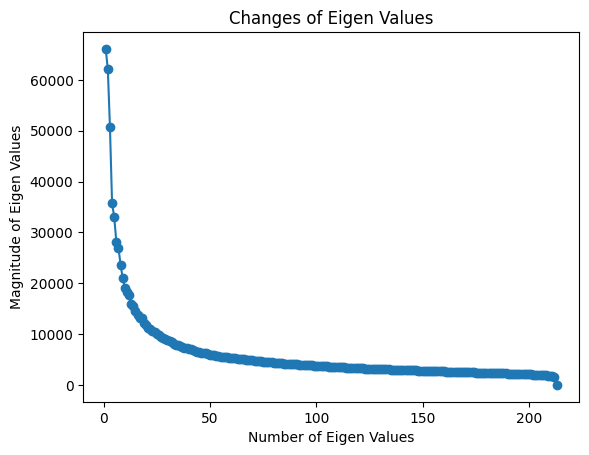

In [6]:
eigenvalues = pca.singular_values_

# Plot the eigenvalues
plt.plot(np.arange(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.xlabel('Number of Eigen Values')
plt.ylabel('Magnitude of Eigen Values')
plt.title('Changes of Eigen Values')
plt.show()

### $\color{deepskyblue}{\text{Compression}}$

In this analysis, we have utilized the "explained_variance_ratio_" attribute to determine the optimal number of principal components for compression. Our goal was to select the smallest number of components that can capture a cumulative explained variance of at least 90%.

By examining the cumulative sum of the explained variance ratios, we observed that after including 43 of principal components, the cumulative explained variance reached or exceeded the desired threshold of 90%. This indicates that these components contain the majority of the information present in the original dataset.

By choosing the optimal number of principal components based on the cumulative explained variance, we can effectively compress the data while retaining a significant portion of the dataset's variability.

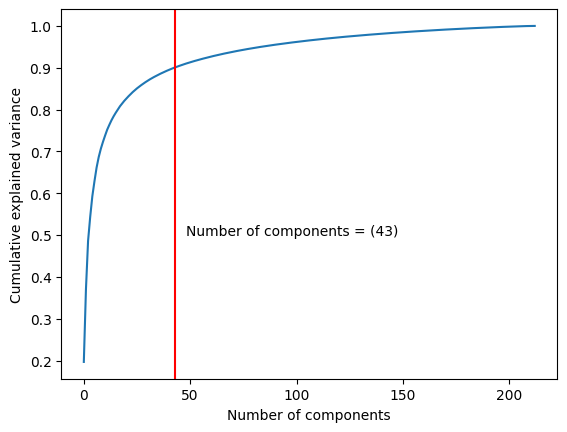

In [7]:
component_with_more_than90 = 0
for i in range(len(np.cumsum(pca.explained_variance_ratio_))):
  if np.cumsum(pca.explained_variance_ratio_)[i] >= 0.9:
    component_with_more_than90 = i
    break

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axvline(x=component_with_more_than90, c='red')
plt.text(component_with_more_than90 + 5, 0.5, 'Number of components = ' + '({})'.format(component_with_more_than90))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

### $\color{deepskyblue}{\text{Plot Faces}}$

In the following analysis, we have visualized the eigenfaces corresponding to the four most significant principal components and the four least significant ones. The eigenfaces represent the patterns that contribute the most and the least to the overall variability in the dataset.

Observing the first four eigenfaces, we can discern meaningful facial features and patterns. These eigenfaces capture the fundamental characteristics that distinguish different faces in the dataset. However, as we move towards the least significant components, we notice that the corresponding eigenfaces exhibit more noise and do not provide meaningful representations of facial features. These eigenfaces may contain variations that are specific to individual images or noise present in the dataset.

This observation highlights the importance of selecting an appropriate number of principal components for dimensionality reduction. Choosing too many components may lead to the inclusion of noise or redundant information, while selecting too few components may result in a loss of significant patterns and details.

In [8]:
def plot_faces(images, n_row, n_col):
    plt.figure(figsize=(3 * n_col, 4 * n_row))
    plt.subplots_adjust(0.6, 0.5, 1.5, 1.5)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((256, 256)), cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())
    plt.tight_layout()
    plt.show()

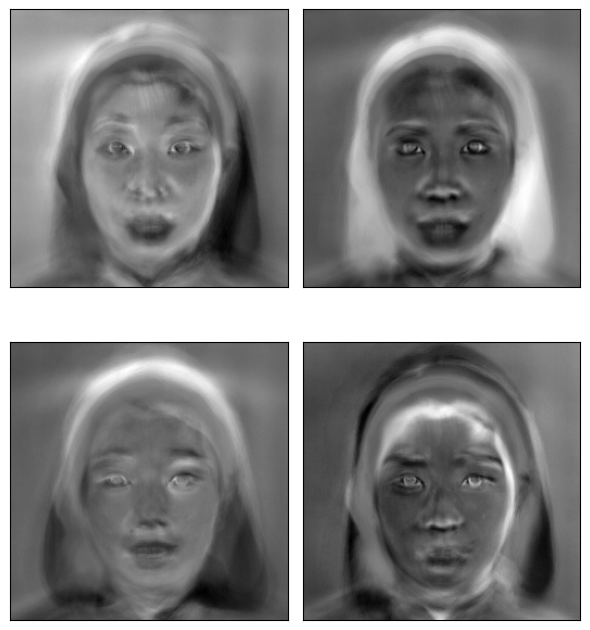

In [9]:
eigenfaces = pca.components_
plot_faces(eigenfaces[:4], 2, 2)

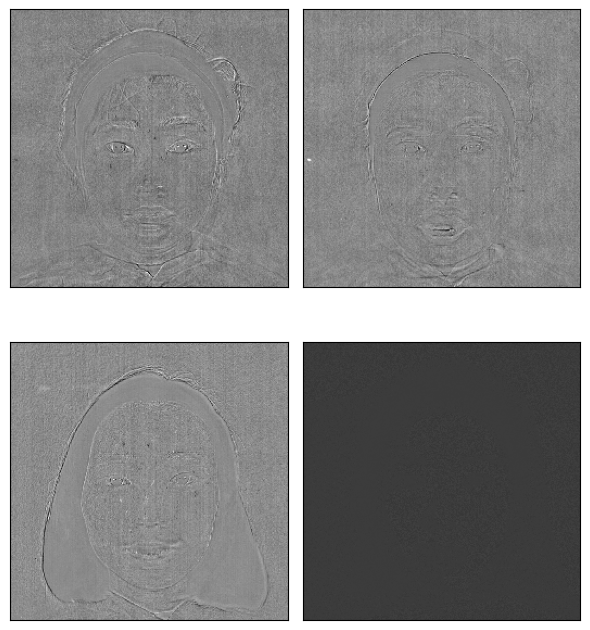

In [10]:
eigenfaces = pca.components_
plot_faces(eigenfaces[-4:], 2, 2)

# $\color{deepskyblue}{\text{Linear Discriminant Analysis}}$

## $\color{deepskyblue}{\text{Data Loading}}$

In [11]:
# X_train = pd.read_csv('/content/drive/MyDrive/Q5_Datasets/part2/Fashion-MNIST/trainData.csv')
# X_test = pd.read_csv('/content/drive/MyDrive/Q5_Datasets/part2/Fashion-MNIST/testData.csv')
# y_train = pd.read_csv('/content/drive/MyDrive/Q5_Datasets/part2/Fashion-MNIST/trainLabels.csv')
# y_test = pd.read_csv('/content/drive/MyDrive/Q5_Datasets/part2/Fashion-MNIST/testLabels.csv')
from sklearn.datasets import fetch_openml
data = fetch_openml('Fashion-MNIST', version=1, cache=True)
X = data['data']
y = data['target']
X.head()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,119.0,114.0,130.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,96.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We've implemented following cade that performs dimensionality reduction and feature extraction for classification tasks. Here's a breakdown of what each part of the code does:

> The *fit* method fits the LDA model to the input data X and corresponding class labels y. It calculates the within-class scatter matrix (*SW*) and the between-class scatter matrix (*SB*) using the input data. These matrices capture the intra-class and inter-class variations, respectively.



> The *seperability_matrix* attribute stores the result of calculating SW^-1 * SB, which is a measure of the separability between classes. The fit method also computes the eigenvalues and eigenvectors of the seperability_matrix. These eigenvalues represent the importance of the corresponding eigenvectors in discriminating between classes.

> The transform method applies the dimensionality reduction by projecting the input data X onto the selected linear discriminants.




In [12]:
class LDA:

    def __init__(self, n_components):
        self.n_components = n_components
        self.linear_discriminants = None

    def fit(self, X, y):
        n_features = X.shape[1]
        class_labels = np.unique(y)
        mean_overall = np.mean(X, axis=0)
        SW = np.zeros((n_features, n_features))
        SB = np.zeros((n_features, n_features))
        for c in class_labels:
            X_c = X[y == c]
            mean_c = np.mean(X_c, axis=0)

            SW += (X_c - mean_c).T.dot((X_c - mean_c))

            n_c = X_c.shape[0]
            mean_diff = np.array(mean_c - mean_overall).reshape(n_features, 1)
            SB += n_c * (mean_diff).dot(mean_diff.T)

        # Determine SW^-1 * SB
        self.seperability_matrix = np.linalg.inv(SW).dot(SB)
        # Get eigenvalues and eigenvectors of SW^-1 * SB
        eigenvalues, eigenvectors = np.linalg.eig(self.seperability_matrix)
        eigenvectors = eigenvectors.T
        idxs = np.argsort(abs(eigenvalues))[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        self.linear_discriminants = eigenvectors[0:self.n_components]
        self.Sb = SB
        self.Sw = SW

    def Sw(self):
      return self.Sw

    def Sb(self):
      return self.Sb

    def seperability_measure(self):
      return np.matrix.trace(self.seperability_matrix)

    def seperability_matrix(self):
      return self.seperability_matrix

    def transform(self, X):
        return np.dot(X, self.linear_discriminants.T)

In [13]:
n_components_ = 9
lda = LDA(n_components = n_components_)
lda.fit(X, y)

In [14]:
seperability_matrix = lda.seperability_matrix

### $\color{deepskyblue}{\text{Plot Eigen Values}}$

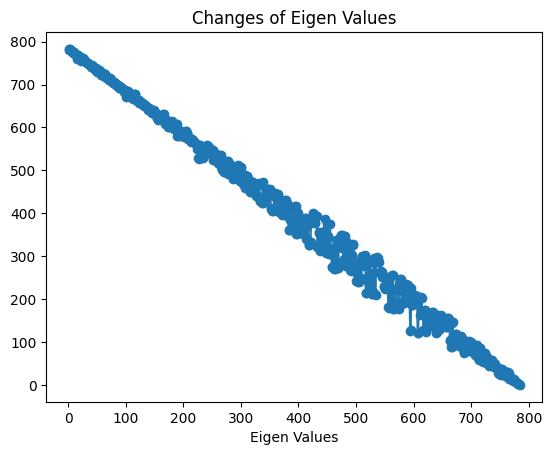

In [15]:
eigenvalues, eigenvectors = np.linalg.eig(seperability_matrix)

eigenvalues = np.argsort(abs(eigenvalues))

# Plot the eigenvalues
plt.plot(np.arange(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.xlabel('Eigen Values')
# plt.ylabel('Explained Variance Ratio')
plt.title('Changes of Eigen Values')
plt.show()

### $\color{deepskyblue}{\text{Effect of Number of Features on Separability}}$

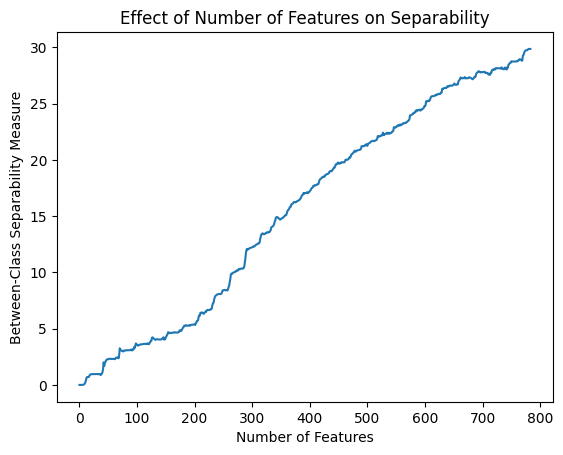

In [16]:
trace = []
for i in range(seperability_matrix.shape[0]):
  trace.append(np.matrix.trace(seperability_matrix[:i+1,:i+1]))

plt.plot(trace)
plt.xlabel('Number of Features')
plt.ylabel('Between-Class Separability Measure')
plt.title('Effect of Number of Features on Separability')
plt.show()